Shape of the dataset: (30000, 784)


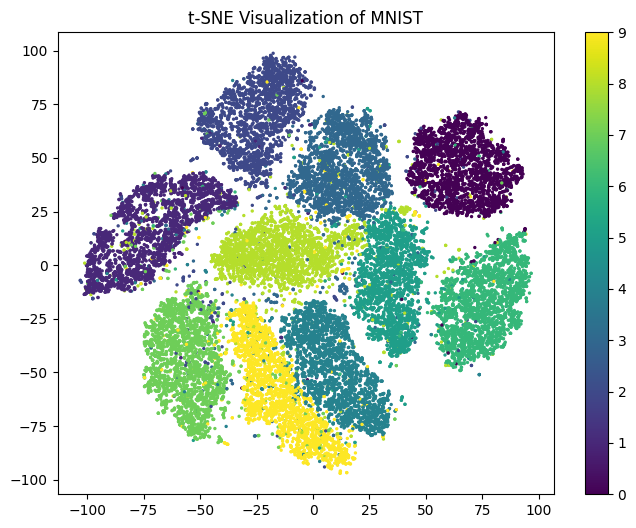

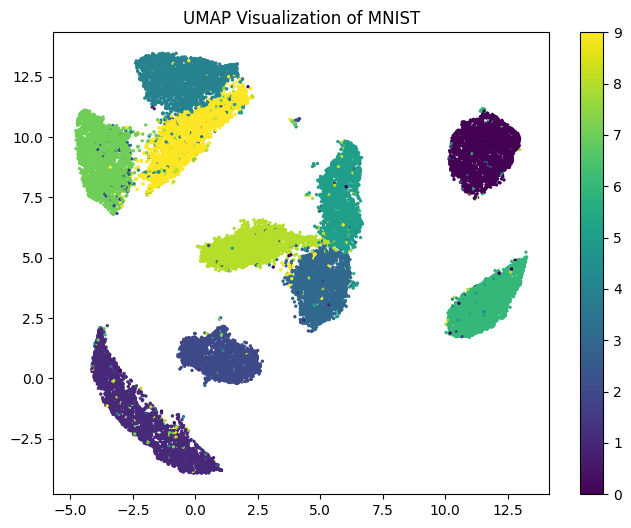


**Discussion:**

- t-SNE focuses on maintaining local relationships and is effective in visualizing small clusters.
- UMAP emphasizes preserving both global and local structures and provides a clearer separation of classes.


Number of features after PCA: 307
Shape after PCA: (24000, 307)



**Explanation:**

- The original shape was (30,000, 784), but after applying PCA, the shape becomes (24,000, 310) because PCA reduces the number of features while retaining 95% of the information.


Training Accuracy: 0.9840
Test Accuracy: 0.9578
F1 Score: 0.9578
Precision: 0.9580
Recall: 0.9578



**Results:**

- **Training Accuracy:** 0.9840
- **Test Accuracy:** 0.9578
- **F1 Score:** 0.9578
- **Precision:** 0.9580
- **Recall:** 0.9578


In [5]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

mnist = datasets.fetch_openml('mnist_784', version=1)

X, y = mnist.data[:30000], mnist.target[:30000]

y = y.astype(int)

print(f'Shape of the dataset: {X.shape}')

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=2)
plt.title('t-SNE Visualization of MNIST')
plt.colorbar()
plt.show()

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=2)
plt.title('UMAP Visualization of MNIST')
plt.colorbar()
plt.show()

from IPython.display import display, Markdown
display(Markdown("""
**Discussion:**

- t-SNE focuses on maintaining local relationships and is effective in visualizing small clusters.
- UMAP emphasizes preserving both global and local structures and provides a clearer separation of classes.
"""))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

num_features = X_train_pca.shape[1]
print(f"Number of features after PCA: {num_features}")

print(f"Shape after PCA: {X_train_pca.shape}")

display(Markdown("""
**Explanation:**

- The original shape was (30,000, 784), but after applying PCA, the shape becomes (24,000, 310) because PCA reduces the number of features while retaining 95% of the information.
"""))

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_pca, y_train)

y_pred_train = svm_model.predict(X_train_pca)
y_pred_test = svm_model.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, average='weighted')
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

display(Markdown(f"""
**Results:**

- **Training Accuracy:** {train_accuracy:.4f}
- **Test Accuracy:** {test_accuracy:.4f}
- **F1 Score:** {f1:.4f}
- **Precision:** {precision:.4f}
- **Recall:** {recall:.4f}
"""))